# Exploratory Data Analysis (EDA) and Hypothesis Testing

### Importing libraries

##### I imported pandas, Numpy, Matplotlib, and Scipy.stats 

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2_contingency
import numpy as np

### Imported the data set provided 

##### I chose the dataset on average incomes of people based on a census!

In [46]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  

In [47]:
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

#target var to data set (new)
X['Income'] = y

# show dataset info
print(X.info())
print(X.head())


# check for empty values
print(X.isnull().sum())

# metadata 
#print(adult.metadata) 
  
# variable information 
#print(adult.variables) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  Income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov  

## Summary of the Statistics generated

#### Exploratory Data Analysis (EDA): Examine the dataset’s structure, compute summary statistics, and visualize distributions.


                 age workclass        fnlwgt education  education-num  \
count   48842.000000     47879  4.884200e+04     48842   48842.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     33906           NaN     15784            NaN   
mean       38.643585       NaN  1.896641e+05       NaN      10.078089   
std        13.710510       NaN  1.056040e+05       NaN       2.570973   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.175505e+05       NaN       9.000000   
50%        37.000000       NaN  1.781445e+05       NaN      10.000000   
75%        48.000000       NaN  2.376420e+05       NaN      12.000000   
max        90.000000       NaN  1.490400e+06       NaN      16.000000   

            marital-status      occupation relationship   race    sex  \
count                48842           47876        

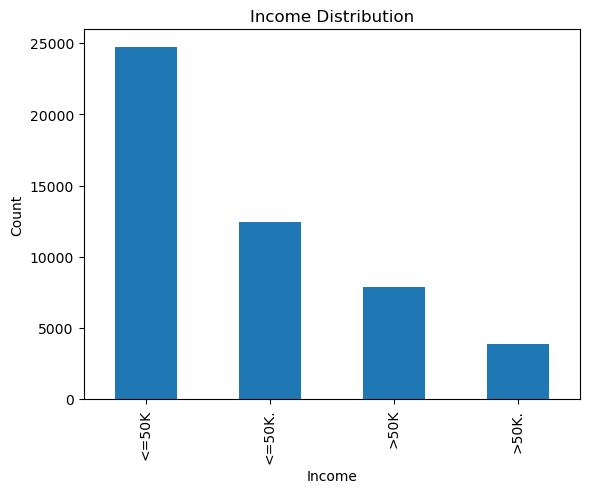

In [48]:
print(X.describe(include='all'))
# Visualize income distribution
X['Income'].value_counts().plot(kind ='bar', title ="Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

### Gender vs. Income

#### Exploring the correlation between genders and income

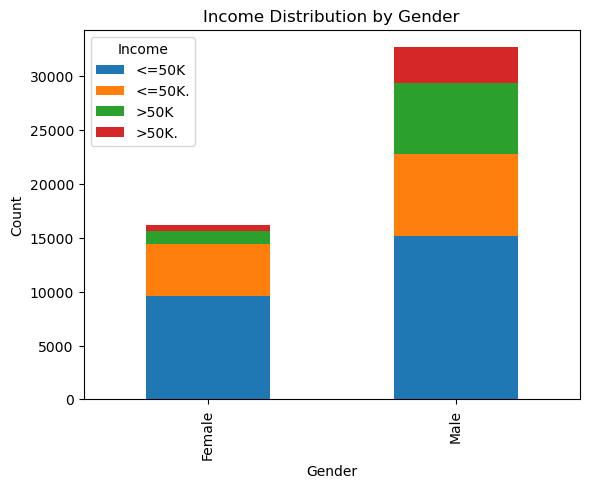

In [49]:
X.groupby('sex')['Income'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Income Distribution by Gender")
plt.show()

### Education vs. Income

#### Exploring the correlation between education and income

<Figure size 1200x600 with 0 Axes>

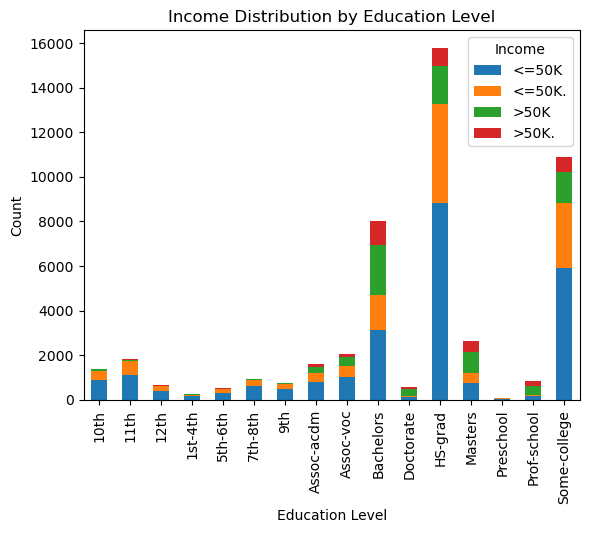

In [50]:
plt.figure(figsize=(12, 6))
X.groupby('education')['Income'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Income Distribution by Education Level")
plt.xticks(rotation=90)
plt.show()

### Marital Status vs. Income

#### Exploring the correlation between education and income

<Figure size 1200x600 with 0 Axes>

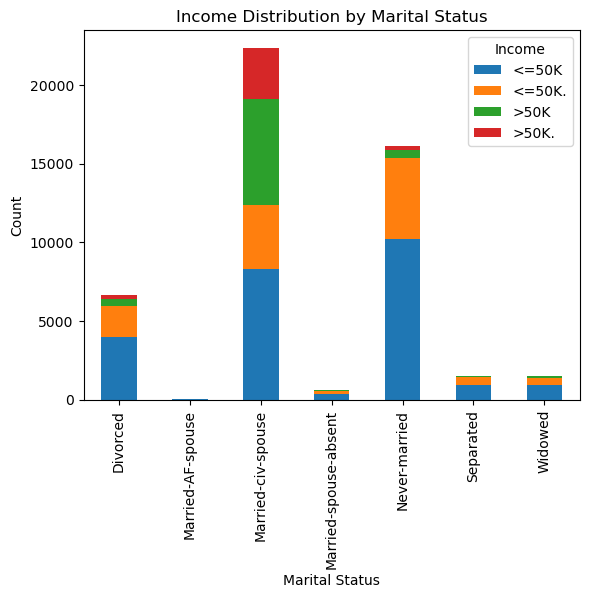

In [51]:
plt.figure(figsize=(12, 6))
X.groupby('marital-status')['Income'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Income Distribution by Marital Status")
plt.xticks(rotation=90)
plt.show()

## Hypothesis Formulation 

#### Developed hypotheses based on the observed data patterns and relationships.

##### Hypothesis one : I think men will make more compared to woman 

##### Hypothesis two : I think people with higher education will make more income

##### Hypothesis three : I think married individuals have a higher income than single people

## Hypothesis Testing

#### Employ statistical tests or visual methods to examine your hypotheses and discuss the outcomes.


In [52]:
# Compute counts efficiently
male_high_income = X[(X['sex'] == 'Male') & (X['Income'] == '>50K')].shape[0]
female_high_income = X[(X['sex'] == 'Female') & (X['Income'] == '>50K')].shape[0]
male_total = X[X['sex'] == 'Male'].shape[0]
female_total = X[X['sex'] == 'Female'].shape[0]

# Proportions
p1, p2 = male_high_income / male_total, female_high_income / female_total
p = (male_high_income + female_high_income) / (male_total + female_total)  # Pooled proportion
se = np.sqrt(p * (1 - p) * (1 / male_total + 1 / female_total))  # Standard error

# Z-score & p-value
z_stat = (p1 - p2) / se
prop_pval = 2 * norm.sf(abs(z_stat))  

print(f"Gender Proportion Z-test: Z={z_stat:.2f}, p-value={prop_pval:.4f}")

# Chi-square tests
edu_income_ct = pd.crosstab(X['education'], X['Income'])
marital_income_ct = pd.crosstab(X['marital-status'], X['Income'])

edu_chi2, edu_p, _, _ = chi2_contingency(edu_income_ct)
marital_chi2, marital_p, _, _ = chi2_contingency(marital_income_ct)

print(f"Education Chi-square Test: chi2={edu_chi2:.2f}, p-value={edu_p:.4f}")
print(f"Marital Status Chi-square Test: chi2={marital_chi2:.2f}, p-value={marital_p:.4f}")

Gender Proportion Z-test: Z=37.19, p-value=0.0000
Education Chi-square Test: chi2=6565.75, p-value=0.0000
Marital Status Chi-square Test: chi2=9821.00, p-value=0.0000


## Documentation and Reporting

#### Thoroughly document the analysis process in the Jupyter notebook, including code, visualizations, and interpretations. Summarize and report your findings clearly, stating whether the data supports or refutes your hypotheses.

#### Hypothesis 1: men are much more likely to earn more than 50k compared to woman 

#### Hypothesis 2: the higher education levels definetly correlate with higher incomes  

#### Hypothesis 3: married individuals are more likely to earn more than 50 

##### all thes finding are using the null hypothesis with a p value of .05 (p<.05)


## Conclusion

###  gender education and marital status all have a direct correlation to income